# Whole Corn Excel

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

wc= pd.read_csv("C:/Users/msteinme/Documents/corn2.csv")
wc.head()


,Year,State,Planted,Acres treated with N,acres treated with P,acres treated with K,N applied,P applied,K applied,PDSI,Precip,Avg Temp
0,1998,CO,1179.248,95.085,68.010,NaN,98.166,21.550,NaN,3.18,18.77,62.3
1,1999,CO,1231.005,97.765,62.889,15.790,138.141,38.186,17.025,1.03,20.03,60.0
2,2000,CO,1348.328,94.611,78.412,NaN,142.775,39.903,NaN,-2.31,16.91,63.5
3,2001,CO,1219.856,NaN,NaN,NaN,NaN,41.078,NaN,-2.69,16.81,63.1
4,2005,CO,1100.402,90.367,67.521,20.294,125.608,35.262,NaN,0.69,18.95,61.9


In [2]:
#tells you what type of value, may be useful when using pyspark mllib
wc.dtypes

Year                      int64
State                    object
Planted                 float64
Acres treated with N    float64
acres treated with P    float64
acres treated with K    float64
N applied               float64
P applied               float64
K applied               float64
PDSI                    float64
Precip                  float64
Avg Temp                float64
dtype: object

In [16]:
co=wc[wc['State']=='CO']#another way to get the state you are interested in
co

,Year,State,Planted,Acres treated with N,acres treated with P,acres treated with K,N applied,P applied,K applied,PDSI,Precip,Avg Temp
0,1998,CO,1179.248,95.085,68.010,NaN,98.166,21.550,NaN,3.18,18.77,62.3
1,1999,CO,1231.005,97.765,62.889,15.790,138.141,38.186,17.025,1.03,20.03,60.0
2,2000,CO,1348.328,94.611,78.412,NaN,142.775,39.903,NaN,-2.31,16.91,63.5
3,2001,CO,1219.856,NaN,NaN,NaN,NaN,41.078,NaN,-2.69,16.81,63.1
4,2005,CO,1100.402,90.367,67.521,20.294,125.608,35.262,NaN,0.69,18.95,61.9
5,2010,CO,1329.949,97.717,NaN,NaN,130.711,29.478,NaN,0.69,18.19,62.1


In [3]:
#planted amount grouped by state
groupall=wc['Planted'].groupby(wc['State']).sum()
groupall

State
CO     7408.788
GA      833.251
IA    99701.660
IL    90497.639
IN    46504.877
KS    24000.726
KY     9035.406
MI    18783.995
MN    57798.760
MO    22751.193
NC     5691.278
ND     5403.123
NE    69149.117
NY     4049.685
OH    27200.351
PA     8750.434
SC      399.619
SD    32407.119
TX    14504.813
WI    29600.524
Name: Planted, dtype: float64

# Iowa Corn

In [4]:
#want to look at just Iowa Row so get rid of the rest
wci=wc[['Year','Planted', 'Acres treated with N','acres treated with P', 'acres treated with K', 'N applied', 'P applied', 'K applied','PDSI', 'Precip','Avg Temp']][9:17]
wci

,Year,Planted,Acres treated with N,acres treated with P,acres treated with K,N applied,P applied,K applied,PDSI,Precip,Avg Temp
9,1996,12699.814,97.607,82.779,81.127,131.530,59.661,76.282,0.68,33.66,65.4
10,1997,12198.968,99.140,74.865,75.024,121.065,63.001,72.993,0.40,29.21,66.4
11,1998,12499.059,95.488,80.059,80.429,128.078,61.329,79.856,1.79,39.57,69.4
12,1999,12101.155,97.891,75.270,75.027,127.092,66.265,80.774,0.92,32.28,67.5
13,2000,12303.371,95.345,73.721,73.919,130.709,55.491,69.384,-1.06,29.73,68.0
14,2001,11696.685,91.153,62.139,61.907,120.296,NaN,NaN,0.21,34.59,67.6
15,2005,12802.748,91.441,72.905,73.198,141.242,64.255,82.586,-0.36,29.84,68.8
16,2010,13399.860,95.154,71.515,68.186,141.426,64.981,80.547,5.27,44.05,68.6


In [5]:
wci2=wc[['Planted', 'Acres treated with N','acres treated with P', 'acres treated with K', 'N applied', 'P applied', 'K applied','PDSI', 'Precip','Avg Temp']][9:17]
wci2

,Planted,Acres treated with N,acres treated with P,acres treated with K,N applied,P applied,K applied,PDSI,Precip,Avg Temp
9,12699.814,97.607,82.779,81.127,131.530,59.661,76.282,0.68,33.66,65.4
10,12198.968,99.140,74.865,75.024,121.065,63.001,72.993,0.40,29.21,66.4
11,12499.059,95.488,80.059,80.429,128.078,61.329,79.856,1.79,39.57,69.4
12,12101.155,97.891,75.270,75.027,127.092,66.265,80.774,0.92,32.28,67.5
13,12303.371,95.345,73.721,73.919,130.709,55.491,69.384,-1.06,29.73,68.0
14,11696.685,91.153,62.139,61.907,120.296,NaN,NaN,0.21,34.59,67.6
15,12802.748,91.441,72.905,73.198,141.242,64.255,82.586,-0.36,29.84,68.8
16,13399.860,95.154,71.515,68.186,141.426,64.981,80.547,5.27,44.05,68.6


In [6]:
#descriptive statistics for Iowa Corn
wci2.describe()

,Planted,Acres treated with N,acres treated with P,acres treated with K,N applied,P applied,K applied,PDSI,Precip,Avg Temp
count,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,8.000000,8.000000
mean,12462.707500,95.402375,74.156625,73.602125,130.179750,62.140429,77.488857,0.981250,34.116250,67.712500
std,516.012264,2.899396,6.142157,6.252497,7.979201,3.681345,4.814675,1.928741,5.262047,1.310875
min,11696.685000,91.153000,62.139000,61.907000,120.296000,55.491000,69.384000,-1.060000,29.210000,65.400000
25%,12174.514750,94.225750,72.557500,71.945000,125.585250,60.495000,74.637500,0.067500,29.812500,67.225000
50%,12401.215000,95.416500,74.293000,74.471500,129.393500,63.001000,79.856000,0.540000,32.970000,67.800000
75%,12725.547500,97.678000,76.467250,76.377500,133.958000,64.618000,80.660500,1.137500,35.835000,68.650000
max,13399.860000,99.140000,82.779000,81.127000,141.426000,66.265000,82.586000,5.270000,44.050000,69.400000


In [7]:
#pearson correlation matrix for Iowa Corn
wci2.corr()

,Planted,Acres treated with N,acres treated with P,acres treated with K,N applied,P applied,K applied,PDSI,Precip,Avg Temp
Planted,1.000000,0.031012,0.362552,0.214185,0.886557,0.213697,0.441554,0.662084,0.538712,0.248767
Acres treated with N,0.031012,1.000000,0.654899,0.619857,-0.269232,-0.013551,-0.433098,0.120643,-0.100520,-0.543316
acres treated with P,0.362552,0.654899,1.000000,0.978301,0.187535,-0.314481,-0.058699,0.026571,-0.008554,-0.241730
acres treated with K,0.214185,0.619857,0.978301,1.000000,0.082554,-0.362845,-0.123867,-0.141830,-0.151096,-0.207228
N applied,0.886557,-0.269232,0.187535,0.082554,1.000000,0.179583,0.513674,0.402104,0.325677,0.399156
P applied,0.213697,-0.013551,-0.314481,-0.362845,0.179583,1.000000,0.790904,0.490131,0.265038,0.168523
K applied,0.441554,-0.433098,-0.058699,-0.123867,0.513674,0.790904,1.000000,0.463253,0.448668,0.438259
PDSI,0.662084,0.120643,0.026571,-0.141830,0.402104,0.490131,0.463253,1.000000,0.907036,0.264707
Precip,0.538712,-0.100520,-0.008554,-0.151096,0.325677,0.265038,0.448668,0.907036,1.000000,0.412950
Avg Temp,0.248767,-0.543316,-0.241730,-0.207228,0.399156,0.168523,0.438259,0.264707,0.412950,1.000000


In [8]:
#correlation matrix using spearman
stats.spearmanr(wci2.corr()) #spearman outliers don't affect

SpearmanrResult(correlation=array([[ 1.        , -0.32121212,  0.03030303, -0.03030303,  0.89090909,
         0.26060606,  0.40606061,  0.57575758,  0.70909091,  0.44242424],
       [-0.32121212,  1.        ,  0.76969697,  0.67272727, -0.61212121,
        -0.47878788, -0.64848485, -0.32121212, -0.5030303 , -0.93939394],
       [ 0.03030303,  0.76969697,  1.        ,  0.95151515, -0.23636364,
        -0.78181818, -0.6969697 , -0.53939394, -0.47878788, -0.6969697 ],
       [-0.03030303,  0.67272727,  0.95151515,  1.        , -0.21212121,
        -0.75757576, -0.62424242, -0.63636364, -0.56363636, -0.63636364],
       [ 0.89090909, -0.61212121, -0.23636364, -0.21212121,  1.        ,
         0.38181818,  0.6       ,  0.49090909,  0.63636364,  0.64848485],
       [ 0.26060606, -0.47878788, -0.78181818, -0.75757576,  0.38181818,
         1.        ,  0.87878788,  0.81818182,  0.63636364,  0.45454545],
       [ 0.40606061, -0.64848485, -0.6969697 , -0.62424242,  0.6       ,
         0.878787

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text xticklabel objects>)

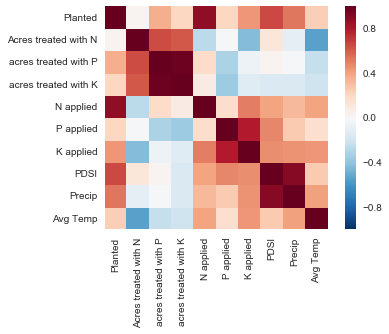

In [15]:
#correlation matrix
import numpy as np
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
cm=wci2.corr()
sns.heatmap(cm,square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

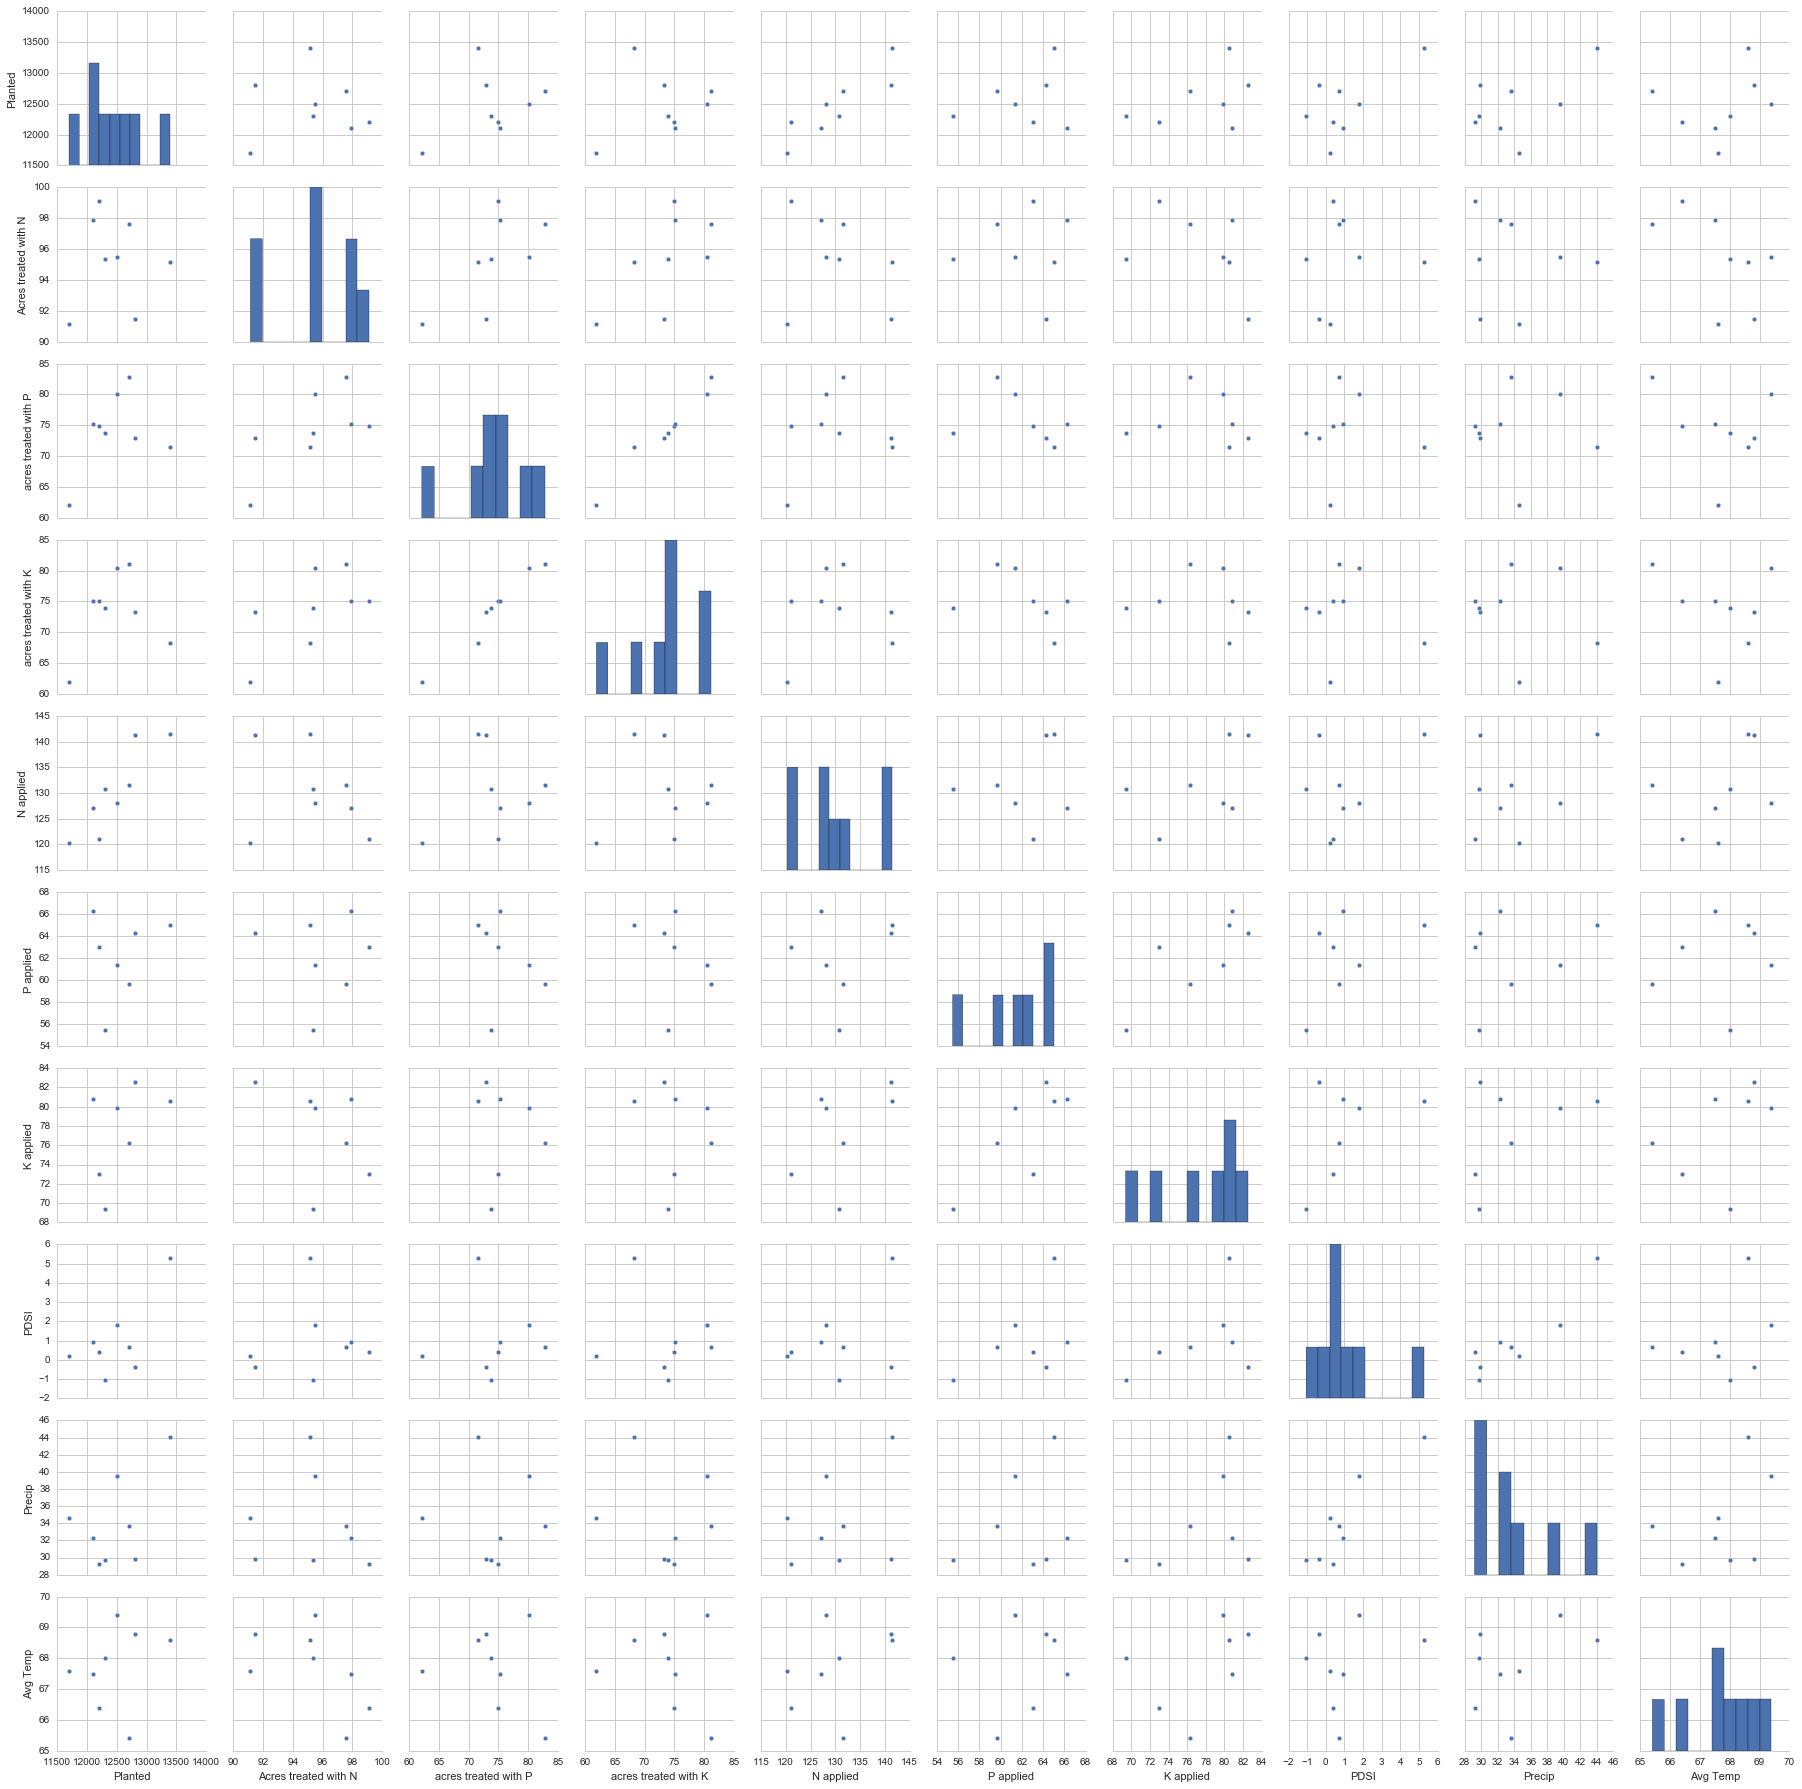

In [16]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(wci2, size=2.5);
plt.show()

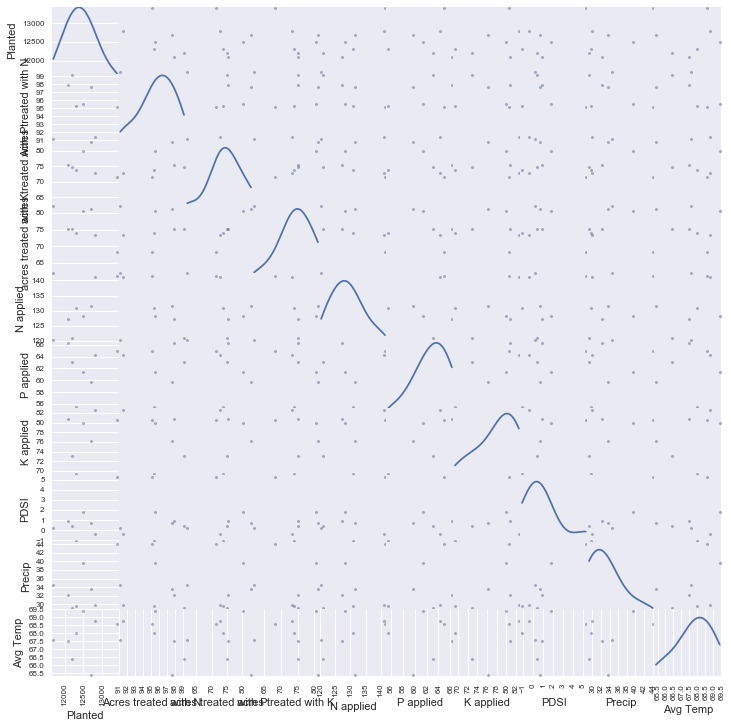

In [20]:
#not enough observations to use histogram, and not enough observations to get rid of any more outliers so I am keeping them in
import pandas as pd
import numpy as np

#scatterplot matrix
dataframe=pd.DataFrame(wci2)
scatterplot= pd.scatter_matrix(dataframe,figsize=(12,12),diagonal='kde', marker='.',grid= True)

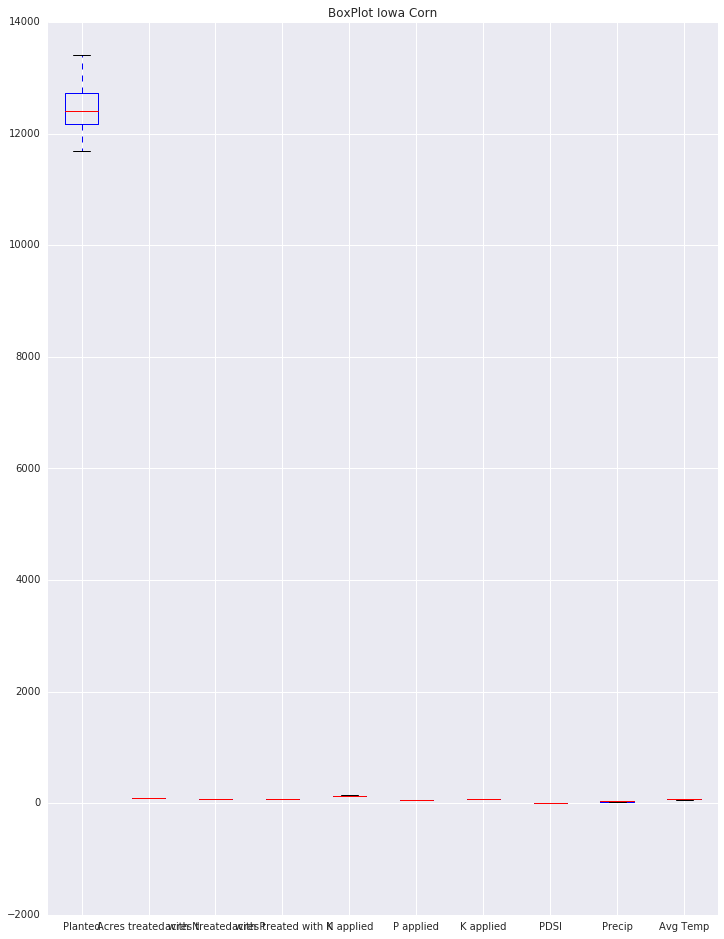

In [21]:
#box plot of each of the variables except years
import matplotlib.pyplot as plt
%matplotlib inline
#creating new one that doesn't have yr called wci2
plt.show(wci2.plot(kind='box', figsize=(12,16),title=('BoxPlot Iowa Corn')))

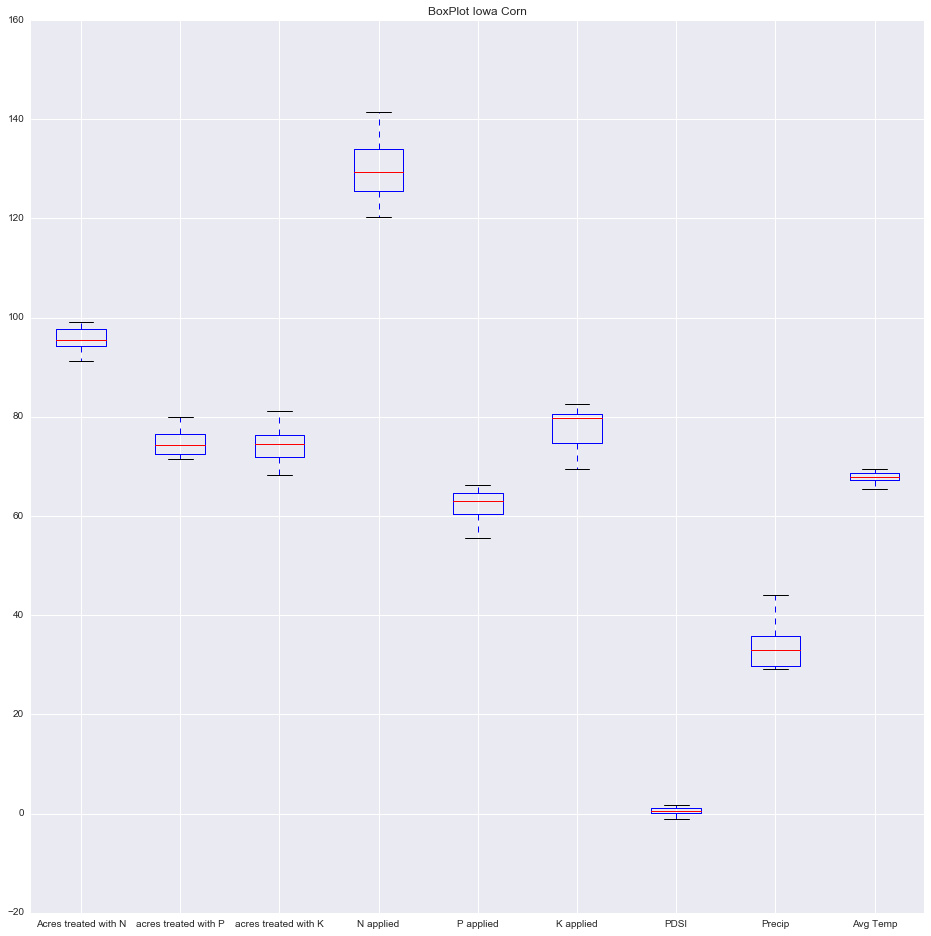

In [11]:
wci3=wc[['Acres treated with N','acres treated with P', 'acres treated with K', 'N applied', 'P applied', 'K applied','PDSI', 'Precip','Avg Temp']][9:17]
plt.show(wci3.plot(kind='box', figsize=(16,16),title=('BoxPlot Iowa Corn')))

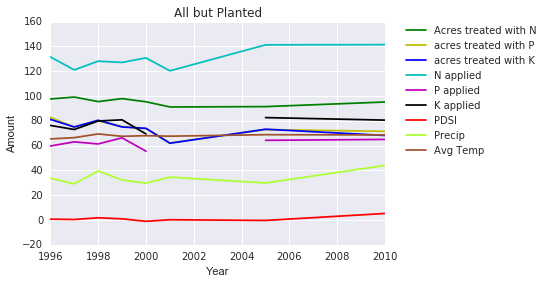

In [23]:
x1= (wci['Year'])
y1=(wci['Planted'])
y2=(wci['Acres treated with N'])
y3=(wci['acres treated with P'])
y4=(wci['acres treated with K'])
y5=(wci['N applied'])
y6=(wci['P applied'])
y7=(wci['K applied'])
y8=(wci['PDSI'])
y9=(wci['Precip'])
y10=(wci['Avg Temp'])
plt.figure()
#plt.plot(x1,y1,'r') #didn't include because otherwise not good graph
plt.plot(x1,y2,'g')
plt.plot(x1,y3,'y')
plt.plot(x1,y4,'b')
plt.plot(x1,y5,'c')
plt.plot(x1,y6,'m')
plt.plot(x1,y7,'k')
plt.plot(x1,y8,'r')
plt.plot(x1,y9,'#adff2f')
plt.plot(x1,y10,'#a0522d')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('All but Planted')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

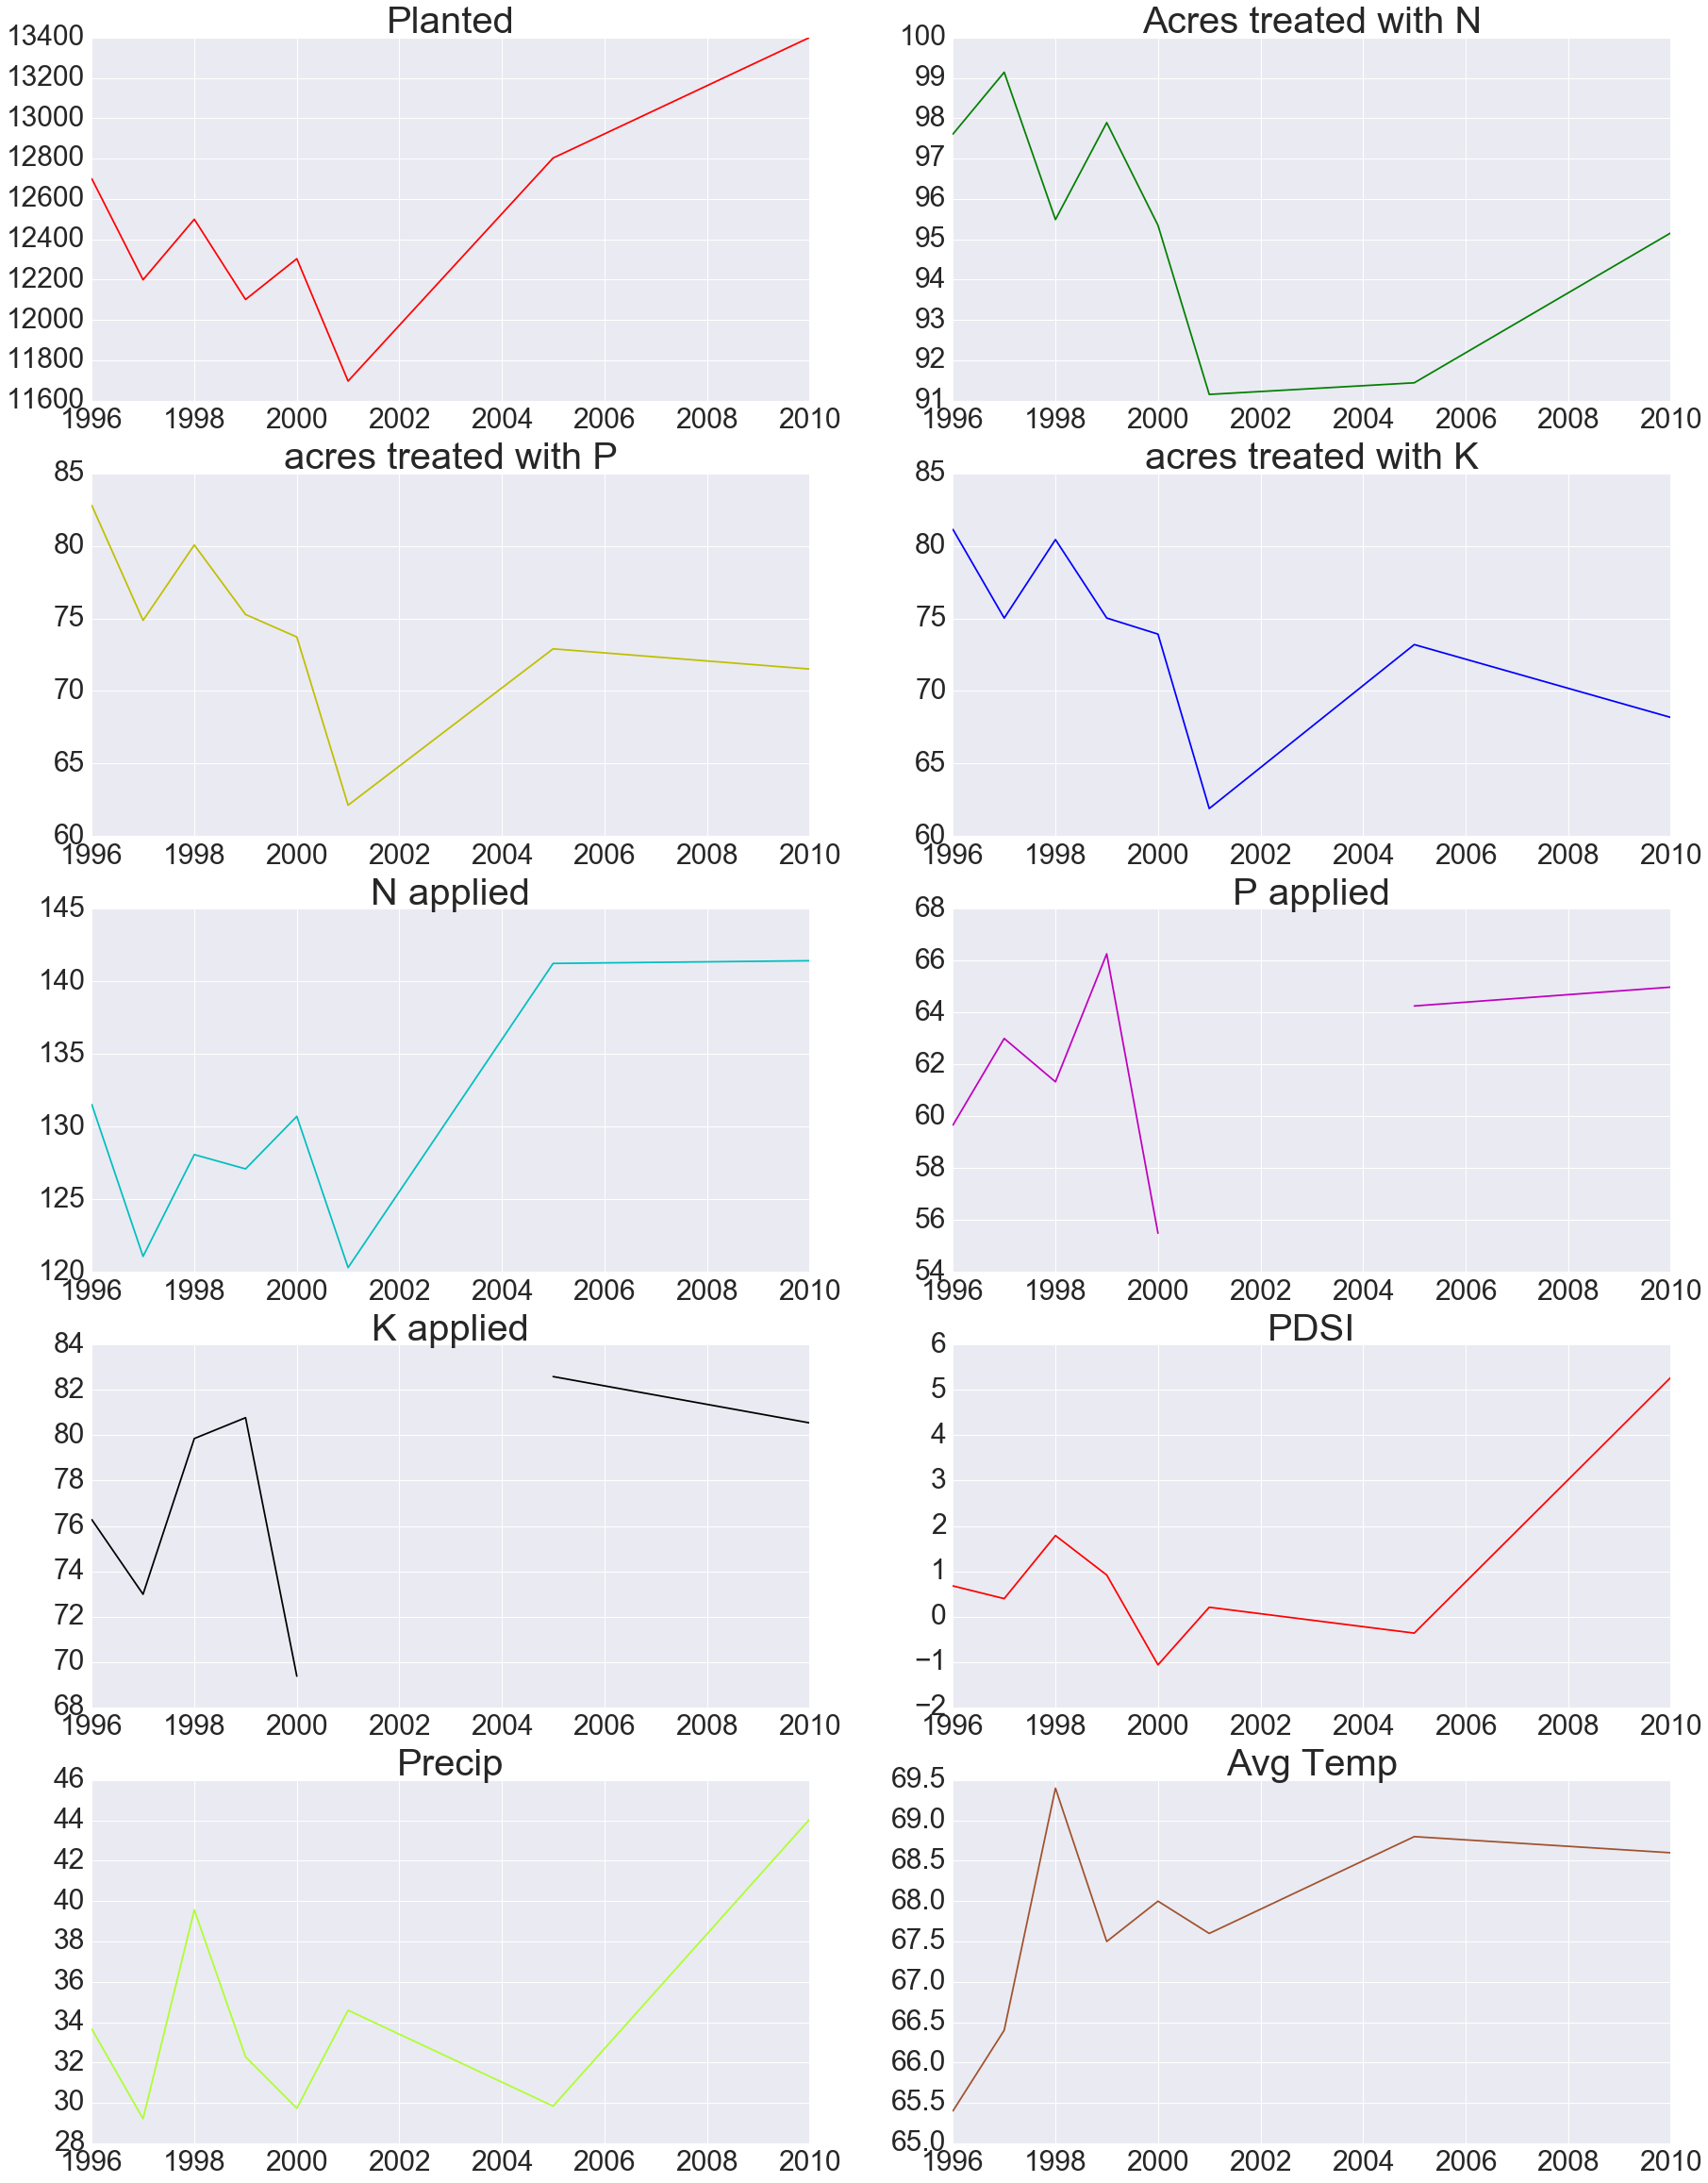

In [24]:
fig=plt.figure(figsize=(30,40))
ax1= fig.add_subplot(521)
ax2= fig.add_subplot(522)
ax3= fig.add_subplot(523)
ax4= fig.add_subplot(524)
ax5= fig.add_subplot(525)
ax6= fig.add_subplot(526)
ax7= fig.add_subplot(527)
ax8= fig.add_subplot(528)
ax9= fig.add_subplot(529)
ax10= fig.add_subplot(5,2,10)
ax1.set_title('Planted',size=(40))
ax2.set_title('Acres treated with N',size=(40))
ax3.set_title('acres treated with P',size=(40))
ax4.set_title('acres treated with K',size=(40))
ax5.set_title('N applied',size=(40))
ax6.set_title('P applied',size=(40))
ax7.set_title('K applied',size=(40))
ax8.set_title('PDSI',size=(40))
ax9.set_title('Precip',size=(40))
ax10.set_title('Avg Temp',size=(40))
ax1.tick_params(axis='x', which='major', labelsize=30)
ax1.tick_params(axis='y', which='major', labelsize=30)
ax2.tick_params(axis='x', which='major', labelsize=30)
ax2.tick_params(axis='y', which='major', labelsize=30)
ax3.tick_params(axis='x', which='major', labelsize=30)
ax3.tick_params(axis='y', which='major', labelsize=30)
ax4.tick_params(axis='x', which='major', labelsize=30)
ax4.tick_params(axis='y', which='major', labelsize=30)
ax5.tick_params(axis='x', which='major', labelsize=30)
ax5.tick_params(axis='y', which='major', labelsize=30)
ax6.tick_params(axis='x', which='major', labelsize=30)
ax6.tick_params(axis='y', which='major', labelsize=30)
ax7.tick_params(axis='x', which='major', labelsize=30)
ax7.tick_params(axis='y', which='major', labelsize=30)
ax8.tick_params(axis='x', which='major', labelsize=30)
ax8.tick_params(axis='y', which='major', labelsize=30)
ax9.tick_params(axis='x', which='major', labelsize=30)
ax9.tick_params(axis='y', which='major', labelsize=30)
ax10.tick_params(axis='x', which='major', labelsize=30)
ax10.tick_params(axis='y', which='major', labelsize=30)
ax1.plot(x1,y1,'r')
ax2.plot(x1,y2,'g')
ax3.plot(x1,y3,'y')
ax4.plot(x1,y4,'b')
ax5.plot(x1,y5,'c')
ax6.plot(x1,y6,'m')
ax7.plot(x1,y7,'k')
ax8.plot(x1,y8,'r')
ax9.plot(x1,y9,'#adff2f')
ax10.plot(x1,y10,'#a0522d')

plt.show()



# Iowa Planted vs Harvested

In [25]:
import pandas as pd
plant_harvest_original = pd.read_csv("C:/Users/msteinme/Documents/planted.csv")
plant_harvest_original.head()

,Year,State,Commodity,AgDistrict,AgDistrictCode,County,CornAcresPlanted,CornGrainAcresHarvested,Temp,Precipitation
0,1926,IOWA,CORN,NORTH CENTRAL,20,KOSSUTH,227717,197644,71.7,5.99
1,1926,IOWA,CORN,NORTHWEST,10,EMMET,91657,79488,73.0,6.61
2,1927,IOWA,CORN,NORTH CENTRAL,20,KOSSUTH,222578,184206,68.0,3.28
3,1927,IOWA,CORN,NORTHWEST,10,EMMET,85850,68337,68.4,3.91
4,1928,IOWA,CORN,NORTH CENTRAL,20,KOSSUTH,228578,197911,71.3,7.40


In [26]:
#average amount planted grouped by district
group_plant = plant_harvest_original['CornAcresPlanted'].groupby(plant_harvest_original['AgDistrict']).mean()
group_plant

AgDistrict
NORTH CENTRAL    257646
NORTHWEST        100775
Name: CornAcresPlanted, dtype: int64

In [27]:
#average amount harvested grouped by district
group_harvest = plant_harvest_original['CornGrainAcresHarvested'].groupby(plant_harvest_original['AgDistrict']).mean()
group_harvest

AgDistrict
NORTH CENTRAL    247523
NORTHWEST         95926
Name: CornGrainAcresHarvested, dtype: int64

In [4]:
group_harvest2 = plant_harvest_original.groupby(['Year','AgDistrict']).mean()
group_harvest2

AgDistrictCode  CornAcresPlanted  CornGrainAcresHarvested  \
Year AgDistrict                                                                 
1926 NORTH CENTRAL              20            227717                   197644   
     NORTHWEST                  10             91657                    79488   
1927 NORTH CENTRAL              20            222578                   184206   
     NORTHWEST                  10             85850                    68337   
1928 NORTH CENTRAL              20            228578                   197911   
     NORTHWEST                  10             90516                    77587   
1929 NORTH CENTRAL              20            228017                   198310   
     NORTHWEST                  10             90628                    79346   
1930 NORTH CENTRAL              20            236876                   205849   
     NORTHWEST                  10             92916                    77836   
1931 NORTH CENTRAL              20            245248                   218206   
     NORTHWEST                  10             96363                    84360   
1932 NORTH CENTRAL              20            239910                   219899   
     NORTHWEST                  10             94297                    83772   
1933 NORTH CENTRAL              20            239319                   217426   
     NORTHWEST                  10             96898                    88901   
1934 NORTH CENTRAL              20            213702                   196502   
     NORTHWEST                  10             84298                    77380   
1935 NORTH CENTRAL              20            213702                   196502   
     NORTHWEST                  10             84298                    77380   
1936 NORTH CENTRAL              20            235923                   203526   
     NORTHWEST                  10             92722                    80677   
1937 NORTH CENTRAL              20            231785                   215913   
     NORTHWEST                  10             93023                    87198   
1938 NORTH CENTRAL              20            208544                   199470   
     NORTHWEST                  10             83145                    79276   
1939 NORTH CENTRAL              20            193708                   185918   
     NORTHWEST                  10             76543                    74139   
1940 NORTH CENTRAL              20            189274                   181990   
     NORTHWEST                  10             75791                    72828   
...                            ...               ...                      ...   
2001 NORTH CENTRAL              20            293000                   288100   
     NORTHWEST                  10            111000                   108800   
2002 NORTH CENTRAL              20            298000                   294000   
     NORTHWEST                  10            117000                   114500   
2003 NORTH CENTRAL              20            299500                   295000   
     NORTHWEST                  10            117000                   114500   
2004 NORTH CENTRAL              20            312000                   308000   
     NORTHWEST                  10            123000                   121000   
2005 NORTH CENTRAL              20            308000                   305000   
     NORTHWEST                  10            118000                   116000   
2006 NORTH CENTRAL              20            306000                   303500   
     NORTHWEST                  10            123000                   121900   
2007 NORTH CENTRAL              20            339500                   336400   
     NORTHWEST                  10            133500                   132100   
2008 NORTH CENTRAL              20            320000                   315500   
     NORTHWEST                  10            122000                   119500   
2009 NORTH CENTRAL              20            32000

In [28]:
#I will use just district code from now on instead of words because Python prefers numbers
plant_harvest = plant_harvest_original[['Year', 'AgDistrictCode', 'CornAcresPlanted', 'CornGrainAcresHarvested', 'Temp', 'Precipitation']]
plant_harvest.head()

,Year,AgDistrictCode,CornAcresPlanted,CornGrainAcresHarvested,Temp,Precipitation
0,1926,20,227717,197644,71.7,5.99
1,1926,10,91657,79488,73.0,6.61
2,1927,20,222578,184206,68.0,3.28
3,1927,10,85850,68337,68.4,3.91
4,1928,20,228578,197911,71.3,7.40


In [29]:
plant_harvest_20_old = plant_harvest_original[plant_harvest_original['County'] == 'KOSSUTH']
plant_harvest_10_old = plant_harvest_original[plant_harvest_original['County'] == 'EMMET']
plant_harvest_20 = plant_harvest_20_old[['Year', 'CornAcresPlanted', 'CornGrainAcresHarvested', 'Temp', 'Precipitation']]
plant_harvest_10 = plant_harvest_10_old[['Year', 'CornAcresPlanted', 'CornGrainAcresHarvested', 'Temp', 'Precipitation']]
print(plant_harvest_10.shape)
print(plant_harvest_20.shape)

(90, 5)
(90, 5)


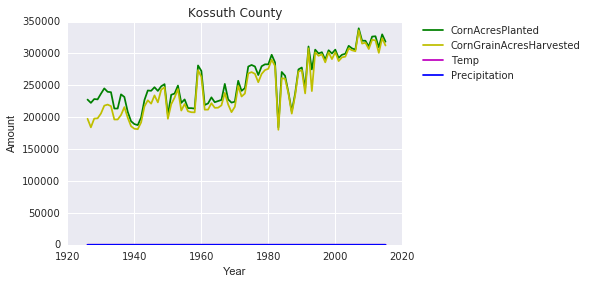

In [30]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x1 = (plant_harvest_20['Year'])
y1 = (plant_harvest_20['CornAcresPlanted'])
y2 = (plant_harvest_20['CornGrainAcresHarvested'])
y3 = (plant_harvest_20['Temp'])
y4 = (plant_harvest_20['Precipitation'])
plt.figure()
plt.plot(x1,y1,'g') #plt.plot(xaxis variable, y variable, 'color')
plt.plot(x1,y2,'y')
plt.plot(x1,y3,'m')
plt.plot(x1,y4,'b')
plt.xlabel('Year') #labels x axis
plt.ylabel('Amount')
plt.title('Kossuth County')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #this puts the legend off of the graph
plt.show()

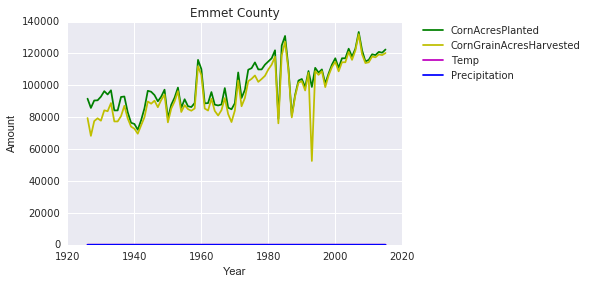

In [31]:
x2 = (plant_harvest_10['Year'])
y5 = (plant_harvest_10['CornAcresPlanted'])
y6 = (plant_harvest_10['CornGrainAcresHarvested'])
y7 = (plant_harvest_10['Temp'])
y8 = (plant_harvest_10['Precipitation'])
plt.figure()
plt.plot(x2,y5,'g') #plt.plot(xaxis variable, y variable, 'color')
plt.plot(x2,y6,'y')
plt.plot(x2,y7,'m')
plt.plot(x2,y8,'b')
plt.xlabel('Year') #labels x axis
plt.ylabel('Amount')
plt.title('Emmet County')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #this puts the legend off of the graph
plt.show()

<function matplotlib.pyplot.show>

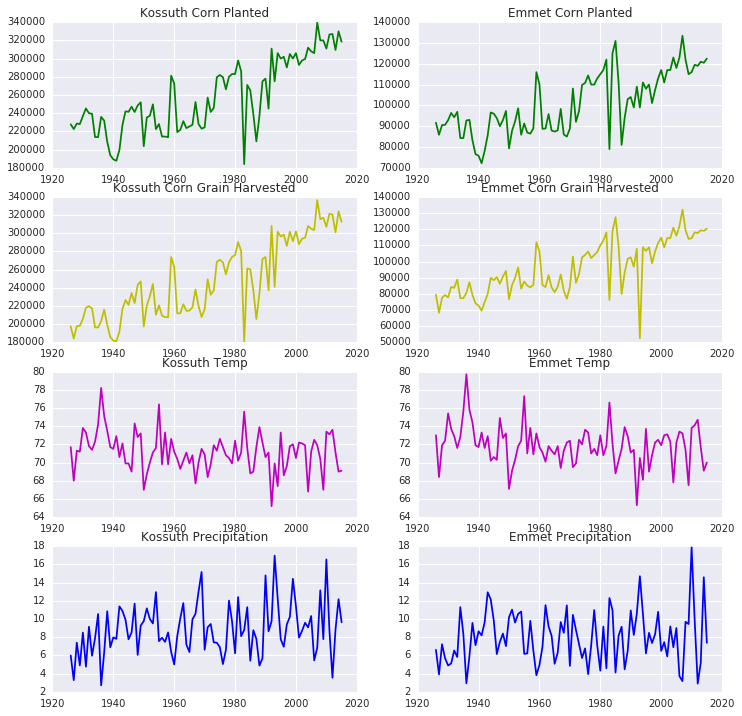

In [36]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(421)
ax2 = fig.add_subplot(422)
ax3 = fig.add_subplot(423)
ax4 = fig.add_subplot(424)
ax5 = fig.add_subplot(425)
ax6 = fig.add_subplot(426)
ax7 = fig.add_subplot(427)
ax8 = fig.add_subplot(428)
ax1.plot(x1,y1,'g')
ax2.plot(x2,y5,'g')
ax3.plot(x1,y2,'y')
ax4.plot(x2,y6,'y')
ax5.plot(x1,y3,'m')
ax6.plot(x2,y7,'m')
ax7.plot(x1,y4,'b')
ax8.plot(x2,y8,'b')
ax1.set_title('Kossuth Corn Planted')
ax3.set_title('Kossuth Corn Grain Harvested')
ax5.set_title('Kossuth Temp')
ax7.set_title('Kossuth Precipitation')
ax2.set_title('Emmet Corn Planted')
ax4.set_title('Emmet Corn Grain Harvested')
ax6.set_title('Emmet Temp')
ax8.set_title('Emmet Precipitation')
plt.show


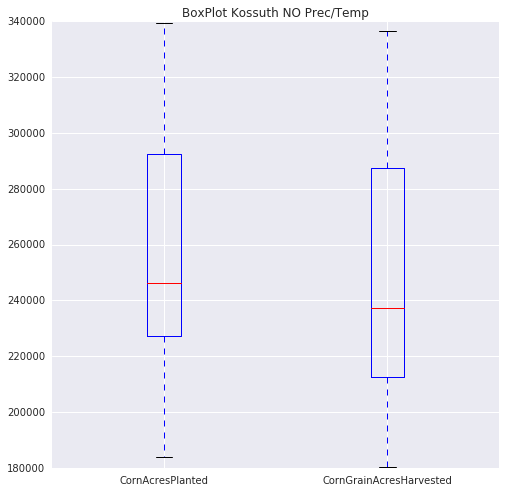

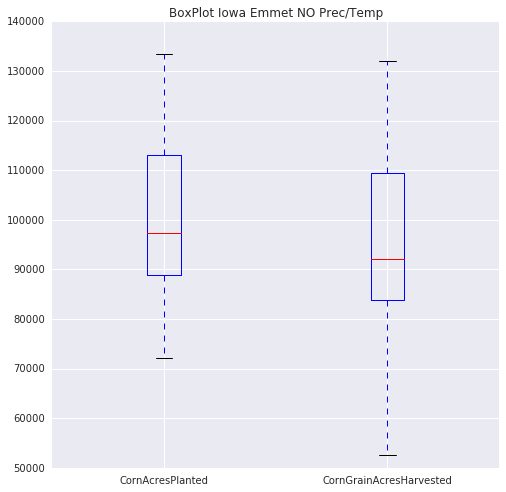

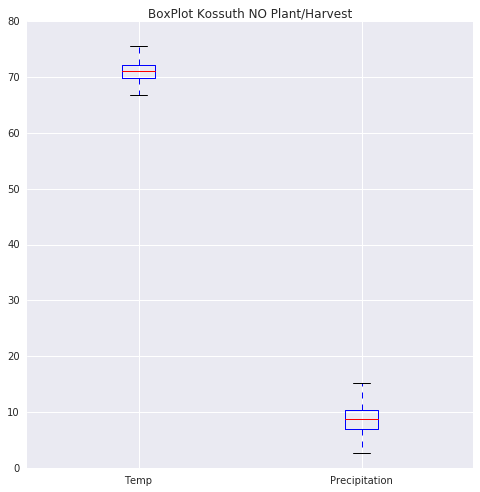

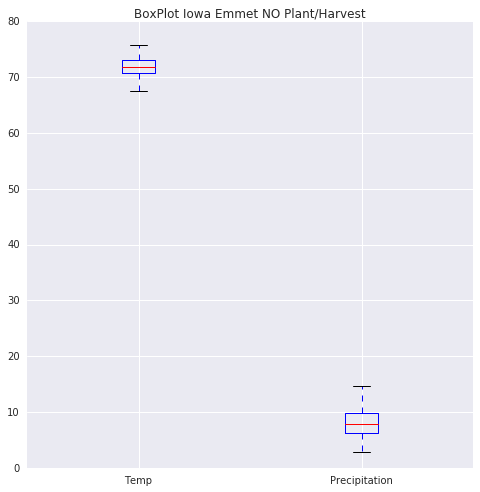

In [43]:
plant_harvest_20_noweather = plant_harvest_20[['CornAcresPlanted','CornGrainAcresHarvested']]
plant_harvest_10_noweather = plant_harvest_10[['CornAcresPlanted','CornGrainAcresHarvested']]
plant_harvest_20_weather = plant_harvest_20[['Temp','Precipitation']]
plant_harvest_10_weather = plant_harvest_10[['Temp','Precipitation']]
plt.show(plant_harvest_20_noweather.plot(kind='box', figsize=(8,8),title=('BoxPlot Kossuth NO Prec/Temp')))
plt.show(plant_harvest_10_noweather.plot(kind='box', figsize=(8,8),title=('BoxPlot Iowa Emmet NO Prec/Temp')))
plt.show(plant_harvest_20_weather.plot(kind='box', figsize=(8,8),title=('BoxPlot Kossuth NO Plant/Harvest')))
plt.show(plant_harvest_10_weather.plot(kind='box', figsize=(8,8),title=('BoxPlot Iowa Emmet NO Plant/Harvest')))

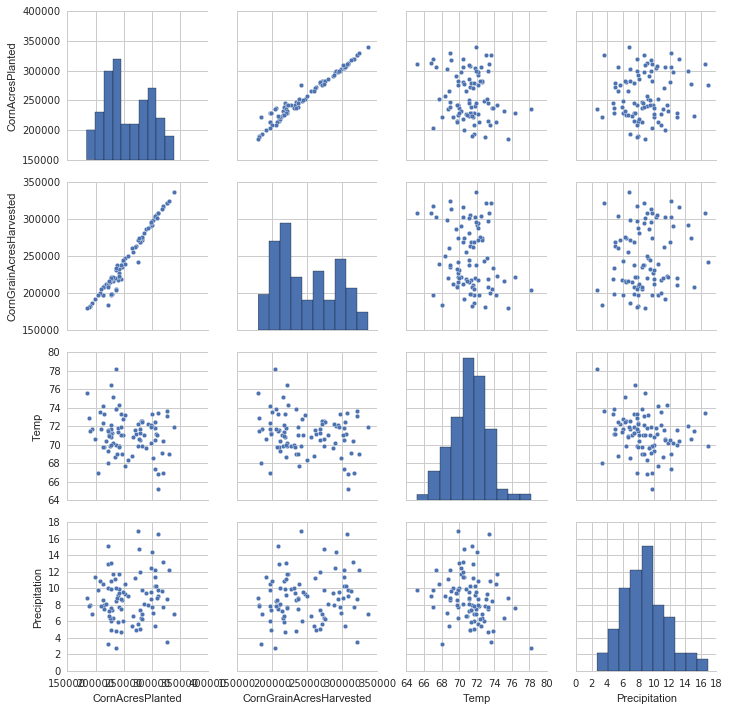

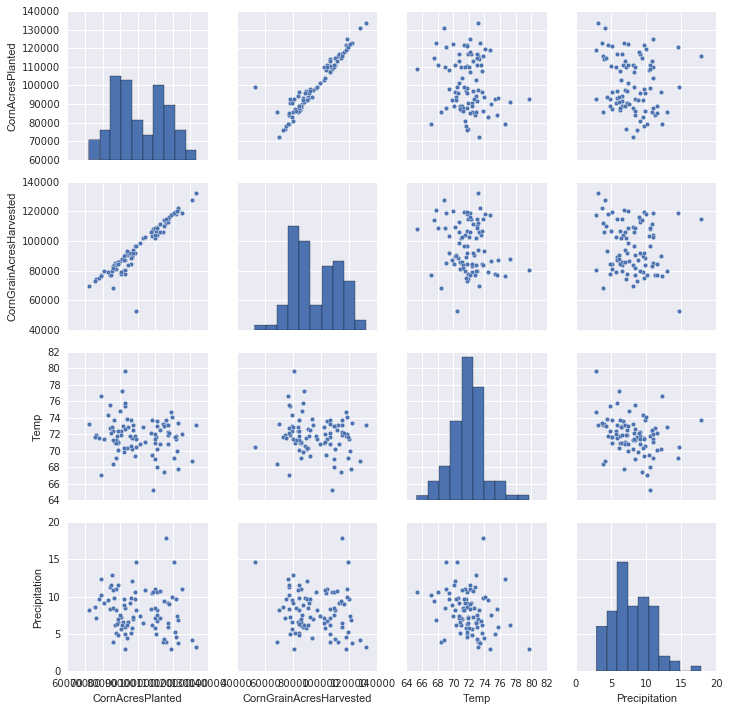

In [48]:
plant_harvest_20_noyear = plant_harvest_20[['CornAcresPlanted','CornGrainAcresHarvested','Temp', 'Precipitation']]
plant_harvest_10_noyear = plant_harvest_10[['CornAcresPlanted','CornGrainAcresHarvested','Temp', 'Precipitation']]

import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.pairplot(plant_harvest_20_noyear, size=2.5)
plt.show()

sns.set(style='darkgrid', context='notebook')
sns.pairplot(plant_harvest_10_noyear, size=2.5)
plt.show()

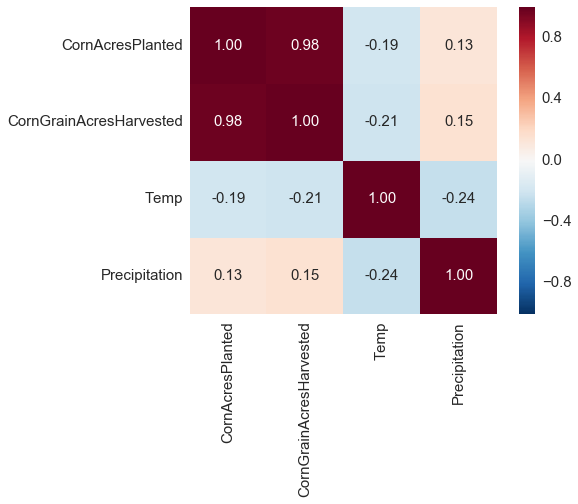

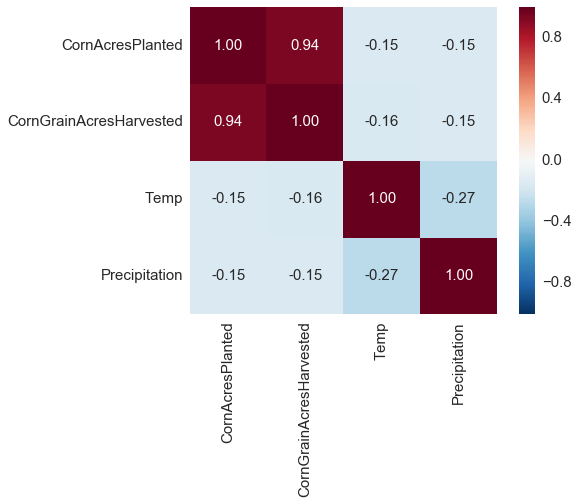

In [49]:
cols= ['CornAcresPlanted','CornGrainAcresHarvested','Temp', 'Precipitation']
cm = np.corrcoef(plant_harvest_20_noyear[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

cols= ['CornAcresPlanted','CornGrainAcresHarvested','Temp', 'Precipitation']
cm = np.corrcoef(plant_harvest_10_noyear[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)
plt.show()

In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#kossuth full model
X = plant_harvest_20[['CornAcresPlanted','Temp', 'Precipitation']]
Y = plant_harvest_20[['CornGrainAcresHarvested']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CornGrainAcresHarvested   R-squared:                       0.969
Model:                                 OLS   Adj. R-squared:                  0.967
Method:                      Least Squares   F-statistic:                     883.6
Date:                     Tue, 08 Mar 2016   Prob (F-statistic):           1.77e-64
Time:                             09:10:43   Log-Likelihood:                -930.95
No. Observations:                       90   AIC:                             1870.
Df Residuals:                           86   BIC:                             1880.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const            -8472.8055   3.05e+04     -0.278      0.782     -6.91e+04  5.21e+04
CornAcresPlanted     1.0622      0.021     50.040      0.000         1.020     1.104
Temp              -285.0552    399.576     -0.713      0.478     -1079.386   509.276
Precipitation      295.3394    299.254      0.987      0.326      -299.558   890.237
==============================================================================
Omnibus:                       35.334   Durbin-Watson:                   0.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.299
Skew:                          -1.583   Prob(JB):                     6.62e-15
Kurtosis:                       5.718   Cond. No.                     9.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
#kossuth only planted
X = plant_harvest_20[['CornAcresPlanted']]
Y = plant_harvest_20[['CornGrainAcresHarvested']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CornGrainAcresHarvested   R-squared:                       0.968
Model:                                 OLS   Adj. R-squared:                  0.968
Method:                      Least Squares   F-statistic:                     2653.
Date:                     Tue, 08 Mar 2016   Prob (F-statistic):           1.69e-67
Time:                             09:11:19   Log-Likelihood:                -931.92
No. Observations:                       90   AIC:                             1868.
Df Residuals:                           88   BIC:                             1873.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const            -2.762e+04   5403.210     -5.112      0.000     -3.84e+04 -1.69e+04
CornAcresPlanted     1.0679      0.021     51.504      0.000         1.027     1.109
==============================================================================
Omnibus:                       35.885   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.674
Skew:                          -1.641   Prob(JB):                     9.04e-15
Kurtosis:                       5.545   Cond. No.                     1.74e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#emmet full model
X = plant_harvest_10[['CornAcresPlanted','Temp', 'Precipitation']]
Y = plant_harvest_10[['CornGrainAcresHarvested']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CornGrainAcresHarvested   R-squared:                       0.888
Model:                                 OLS   Adj. R-squared:                  0.884
Method:                      Least Squares   F-statistic:                     228.1
Date:                     Tue, 08 Mar 2016   Prob (F-statistic):           8.00e-41
Time:                             09:13:23   Log-Likelihood:                -902.20
No. Observations:                       90   AIC:                             1812.
Df Residuals:                           86   BIC:                             1822.
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const            -1400.4022   2.23e+04     -0.063      0.950     -4.57e+04  4.29e+04
CornAcresPlanted     1.0589      0.042     25.215      0.000         0.975     1.142
Temp              -122.0805    283.779     -0.430      0.668      -686.215   442.054
Precipitation      -75.4980    222.124     -0.340      0.735      -517.065   366.069
==============================================================================
Omnibus:                      131.414   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4525.774
Skew:                          -4.977   Prob(JB):                         0.00
Kurtosis:                      36.283   Cond. No.                     3.86e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#emmet only planted
X = plant_harvest_10[['CornAcresPlanted']]
Y = plant_harvest_10[['CornGrainAcresHarvested']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CornGrainAcresHarvested   R-squared:                       0.888
Model:                                 OLS   Adj. R-squared:                  0.887
Method:                      Least Squares   F-statistic:                     698.2
Date:                     Tue, 08 Mar 2016   Prob (F-statistic):           1.28e-43
Time:                             09:14:13   Log-Likelihood:                -902.32
No. Observations:                       90   AIC:                             1809.
Df Residuals:                           88   BIC:                             1814.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const            -1.129e+04   4099.306     -2.753      0.007     -1.94e+04 -3140.131
CornAcresPlanted     1.0639      0.040     26.423      0.000         0.984     1.144
==============================================================================
Omnibus:                      132.856   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4759.380
Skew:                          -5.052   Prob(JB):                         0.00
Kurtosis:                      37.163   Cond. No.                     7.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 1)CornGrainAcresHarvested        0.338641
 2)Temp                           0.331053
 3)Precipitation                  0.330306


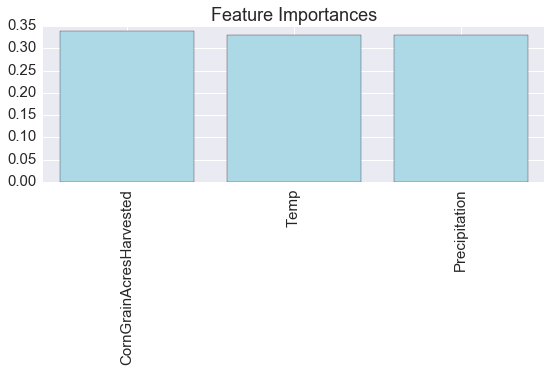

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import accuracy_score
X=plant_harvest_10_noyear[['Temp', 'Precipitation','CornAcresPlanted']].values
y=plant_harvest_10_noyear['CornGrainAcresHarvested'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4,random_state=1)
forest = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
feat_labels = plant_harvest_20_noyear.columns[1:]
importances= forest.feature_importances_
indices= np.argsort(importances)[::-1]
for f in range (X_train.shape[1]):
    print("%2d)%-*s %f" % (f+1,30,feat_labels[f],importances[indices[f]]))   #30 is just for formatting
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices], color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)
plt.tight_layout()
plt.show()